In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np 
from scipy.optimize import fsolve, root
#from scipy.optimize import root
import math

In [70]:
# CONSTANTS and PARAMETERS

# general physics
ε0 = 8.85418782e-12 # [F/m] vacuum permittivity epsilon_0
c0 = 299792458      # [m/s] speed of light in vacuum c_0
ħ  = 1.05457180e-34 # [J/s] Planck constant

# geometrical parameters
R    = 9.0e-6        # [m ] radius
w    = 500e-9        # [m ] width
h    = 200e-9        # [m ] height
wga  = w*h           # [m²] core area

L    = 2*np.pi*R     # [m ] core length
V    = L*wga         # [m³] ~ core volume
Veff = V             # [m³] effective mode volume
Γ    = 0.9

ρSi = 2.3290e3      # [kg/m³]
Mring = ρSi*V        # [kg] mass of the microring
Cp = 0.7e3           # [J/kg/K] 

# parameters
λ0 = 1.550e-6       # [m]
ω0 = c0/λ0           # ~ 193.1 e12 [Hz] or e0 [THz]
print('resonance:')
print('wavelength λ_0 =   %.4f' % (λ0*1.0e06), 'µm')
print('frequency  ω_0 = %.4f' % (ω0/1.0e12), 'THz')
λp = 1.5505e-6       # [m]
ωp = c0/λp           # ~ 193.1 e12 [Hz] or e0 [THz]
print('resonance:')
print('wavelength λ_P =   %.4f' % (λp*1.0e06), 'µm')
print('frequency  ω_P = %.4f' % (ωp/1.0e12), 'THz')

𝛾TH = 7.5e6      # [Hz]
𝛾FC = 250e6      # [Hz] or 250 µs-¹

# refractive index
nSi = 3.48       # Silicon refractive index
n0 = nSi         # standard refractive index
nT = 1.8e-4      # [1/K] at 300 K.
dTdP = 1e-6      # [K/(W/cm^2)]
n2 = 5e-14       # [1/(W/cm²)] intensity-dependent refractive index
n2 = 4.5e-18       # [1/(W/m²)]  intensity-dependent refractive index
dndT = 1.86e-4   # [1/K]
dndN = -1.73e-27 # [m³]
dαdN =  1.1e-15  # [m²]
βtpa =  0.7e-11  # [m/W]
vg = c0/4        # [m/s]

κa = 0.15
κb = κa
τa = L / (κa**2 * vg)
τb = τa
τ0 = 3.0e-9 # [Hz] ~ 1 / (α * vg)

σ = np.sqrt(0.5*c0*ε0*n0*wga)  # [ W / (V/m) ]
Ep =  np.power( 0.000, 0.5)    # [ σ * (V/m) ]
Es =  np.power( 100, 0.5)      # [ σ * (V/m) ]

#ω, ωp, ω0, Ep, Es, τa, τb, τ0, 𝛾TH, 𝛾FC, Mring, Cp, n0, n2, dndT, dndN, dαdN, βtpa, Γ, V, Veff = par

resonance:
wavelength λ_0 =   1.5500 µm
frequency  ω_0 = 193.4145 THz
resonance:
wavelength λ_P =   1.5505 µm
frequency  ω_P = 193.3521 THz


In [ ]:
# print(1550e-9**2/(L*20e-9))
print(L)

In [54]:
# greek letters and other symbols (Ctrl+Shift+u):
# Γ = u0393
# Δ = u0394
# Ω = u03a9

# α = u03b1
# β = u03b2
# γ = u03b3, 𝛾 = u1D6FE
# δ = u03b4
# ε = u03b5

# λ = u03bb

# σ = u03c3
# τ = u03c4

# ψ = u03c8
# ω = u03c9

In [55]:
# Constant normalized to the main quantities, i.e. Power, Energy, Temperature, Population

In [56]:
# useful functions
def wlen_to_freq(wlen):
    return c0/wlen # returns the frequency [Hz] from the wavelength [m]

def freq_to_wlen(freq):
    return c0/freq # returns the wavelength [m] from the frequency [Hz]

In [57]:
# Energy inside the cavity due to
# pump field:
def U_internal(ω, E, ω0, τa, τb, τ0):
    return np.sqrt(2/τa)*E/( (ω-ω0)-1J*(1/τa+1/τb+1/τ0) )

def get_initial_conditions(ωs, ωp, ω0, Ep, Es, τa, τb, τ0):
    # UpR, UpI
    tmp1 = np.real( U_internal(ωp, Ep, ω0, τa, τb, τ0) )
    tmp2 = np.imag( U_internal(ωp, Ep, ω0, τa, τb, τ0) )
    # UsR, UsI
    tmp3 = np.real( U_internal(ωs, Es, ω0, τa, τb, τ0) )
    tmp4 = np.imag( U_internal(ωs, Es, ω0, τa, τb, τ0) )
    # Utot
    tmp5 = tmp1**2+tmp2**2 + tmp3**2+tmp3**2
    # ΔN, ΔT, ΔωR, ΔωI
    tmp6 = 1.0e3
    tmp7 = 0.0
    tmp8 = 0.0
    tmp9 = 0.0
    
    return (tmp1, tmp2, tmp3, tmp4, tmp5, tmp6, tmp7, tmp8, tmp9, )
#
#def fU2([U1, U2, Utot, ΔT, ΔN, Δω], ωp, E2, ω0, Δω, τa, τb, τ0):
#    return ( -1J*(ωp-ω0-Δω)-(1/τa+1/τb+1/τ0) )*U2 + 1J*np.sqrt(2/τa)*E2
#
#def fUint([U1, U2, Utot, ΔT, ΔN, Δω]):
#    return Utot - np.power(U1,2) - np.power(U2,2)
#
#def fΔT([U1, U2, Utot, ΔT, ΔN, Δω], 𝛾TH, Mring, Cp, τ0, dαdN, Γ, n0, βtpa, Veff):
#    return 1/( 𝛾TH*Mring*Cp ) * (2/τ0 + dαdN*c0*Γ/n0*ΔN + ( c0**2*βtpa )/( np.power(n0,2)*Veff ) *Utot ) * Utot
#
#def fΔN([U1, U2, Utot, ΔT, ΔN, Δω], βtpa, ωp, V, Veff, 𝛾FC):
#    return ( c0**2*βtpa ) / ( 𝛾FC*2*ħ*ωp*V*Veff*np.power(n0,2) ) * np.power(Utot,2)
#
#def fΔω([U1, U2, Utot, ΔT, ΔN, Δω], ω0, n0, n2, Γ, dndT, dndN, dαdN, βtpa, Veff):
#    return Δω + 2*ω0/n0*dndT*Γ*ΔT + ( 2*ω0/n0*dndN - 1J*dαdN*c0/n0 )*Γ*ΔN + ( 2*ω0*c0*n2 + 1J*c0**2*βtpa )/( np.power(n0,2)*Veff )*Utot

In [58]:
def equations(var, *par):
    # variables
    xUpR, xUpI, xUsR, xUsI, xUtot, xΔN, xΔT, xΔωR, xΔωI = var
    # parameters
    pωs, pωp, pω0, pEp, pEs, pτa, pτb, pτ0, p𝛾TH, p𝛾FC, pMring, pCp, pn0, pn2, pdndT, pdndN, pdαdN, pβtpa, pΓ, pV, pVeff = par
    # constants
    # c0, ħ

    f1R = +(pωp-pω0+xΔωR)*xUpI +(1/pτa+1/pτb+1/pτ0+xΔωI)*xUpR
    f1I = -(pωp-pω0+xΔωR)*xUpR +(1/pτa+1/pτb+1/pτ0+xΔωI)*xUpI + np.sqrt(2/pτa)*pEp
    f2R = +(pωs-pω0+xΔωR)*xUsI +(1/pτa+1/pτb+1/pτ0+xΔωI)*xUsR
    f2I = -(pωs-pω0+xΔωR)*xUsR +(1/pτa+1/pτb+1/pτ0+xΔωI)*xUsI + np.sqrt(2/pτa)*pEs
    f3R = xUtot - (np.power(xUpR,2)+np.power(xUpI,2) +np.power(xUsR,2)+np.power(xUsI,2))
    f4R = -p𝛾FC*xΔN + c0**2*pβtpa / ( 2*ħ*pωp*pV*pVeff*np.power(pn0,2) ) *np.power(xUtot,2)
    f5R = -p𝛾TH*xΔT + 1/( pMring*pCp ) * (2/pτ0 + pdαdN*c0*pΓ/pn0*xΔN + ( np.power(c0/pn0,2)*pβtpa )/pVeff *xUtot ) * xUtot
    f6R = xΔωR - ( -2*pω0/pn0*pdndT*pΓ*xΔT -2*pω0/pn0*pdndN*pΓ*xΔN -2*pω0*c0*pn2/( np.power(pn0,2)*pVeff )*xUtot )
    f6I = xΔωI - ( pdαdN*c0/pn0*pΓ*xΔN +np.power(c0/pn0,2)*pβtpa/pVeff*xUtot )
    
    return (f1R, f1I, f2R, f2I, f3R, f4R, f5R, f6R, f6I)

In [68]:
if False:
    # The starting estimate for the roots of func(x) = 0.
    # UpR, UpI, UsR, UsI, Utot, ΔN, ΔT, ΔωR, ΔωI
    x0 = (1e3, 1e3, 1e3, 1e3, 1e3, 0.0, 0.0, 1.0e3, 1.0e3)

    # extra arguments to func in fsolve(func, ).
    #ωs = 1.53e-6

    ω_range = np.linspace(wlen_to_freq(1.551e-6), wlen_to_freq(1.5495e-6), 500)
    dataP = []
    dataS = []

    for ωs in ω_range:

        # The starting estimate for the roots of func(x) = 0.
        x0 = get_initial_conditions(ωs, ωp, ω0, Ep, Es, τa, τb, τ0)

        # extra arguments to func in fsolve(func, ... ).
        params = (ωs, ωp, ω0, Ep, Es, τa, τb, τ0, 𝛾TH, 𝛾FC, Mring, Cp, n0, n2, dndT, dndN, dαdN, βtpa, Γ, V, Veff)

        UpR, UpI, UsR, UsI, Utot, ΔN, ΔT, ΔωR, ΔωI =  fsolve(equations, x0, args=params)

        if False:
            print(UpR, UpI, UsR, UsI, Utot, ΔN, ΔT, ΔωR, ΔωI)
            print( equations((UpR, UpI, UsR, UsI, Utot, ΔT, ΔN, ΔωR, ΔωI), *params) )
            print()

        dataP.append(UpR**2+UpI**2)
        dataS.append(UsR**2+UsI**2)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The number of calls to function has reached maxfev = 2000.
  warnings.warn(msg, RuntimeWarning)


In [64]:
if True:
    # The starting estimate for the roots of func(x) = 0.
    # UpR, UpI, UsR, UsI, Utot, ΔN, ΔT, ΔωR, ΔωI
    x0 = (1e3, 1e3, 1e3, 1e3, 1e3, 0.0, 0.0, 1.0e3, 1.0e3)

    # extra arguments to func in fsolve(func, ).
    #ωs = 1.53e-6

    ω_range = np.linspace(wlen_to_freq(1.554e-6), wlen_to_freq(1.546e-6), 500)
    dataP = []
    dataS = []
    data3 = []
    data4 = []

    for ωs in ω_range:

        # The starting estimate for the roots of func(x) = 0.
        x0 = get_initial_conditions(ωs, ωp, ω0, Ep, Es, τa, τb, τ0)

        # extra arguments to func in fsolve(func, ... ).
        #params = (ωs, ωp, ω0, Ep, Es, τa, τb, τ0, 𝛾TH, 𝛾FC, Mring, Cp, n0, n2, dndT, dndN, dαdN, βtpa, Γ, V, Veff)
        params = (ωs, ωp, ω0, Ep, Es, τa, τb, τ0, 𝛾TH, 0.0, Mring, Cp, n0, 0.0, dndT, 0.0, 0.0, 0.0, 1.0, V, Veff)

        UpR, UpI, UsR, UsI, Utot, ΔN, ΔT, ΔωR, ΔωI =  fsolve(equations, x0, args=params)

        if False:
            print(UpR, UpI, UsR, UsI, Utot, ΔN, ΔT, ΔωR, ΔωI)
            print( equations((UpR, UpI, UsR, UsI, Utot, ΔT, ΔN, ΔωR, ΔωI), *params) )
            print()

        dataP.append(UpR**2+UpI**2)
        dataS.append(UsR**2+UsI**2)
        
        data3.append(ΔωR)
        data4.append(ΔωI)

/usr/local/lib/python3.5/dist-packages/scipy/optimize/minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


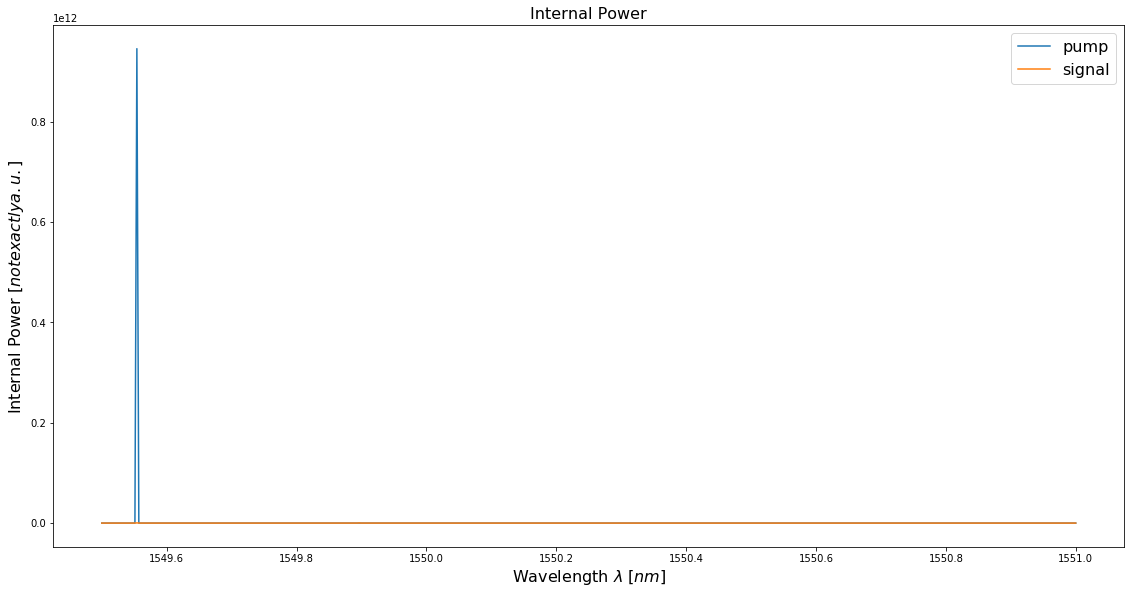

In [69]:
linear = True

plt.show()
plt.close()

fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

if not linear:
    ax1.set_yscale('log')
    ax1.set_ylim([1e-20, 1e-2])
    
ax1.plot(1e9*freq_to_wlen(ω_range), dataP, label='pump')
ax1.plot(1e9*freq_to_wlen(ω_range), dataS, label='signal')

ax1.set_title( r'Internal Power', fontsize=16)
ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Internal Power $[not exactly a.u.]$', fontsize=16)

legend = ax1.legend(loc='upper right', fontsize=16)#, bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()

In [66]:
indx = np.where( dataS==max(dataS) )
print(freq_to_wlen(ω_range[indx]))

indx = np.where( dataS>=max(dataS)/2 )

tmp = freq_to_wlen(ω_range[indx])
print(tmp[0]-tmp[-1])

del indx, tmp

[  1.54972520e-06]
1.55513242531e-09


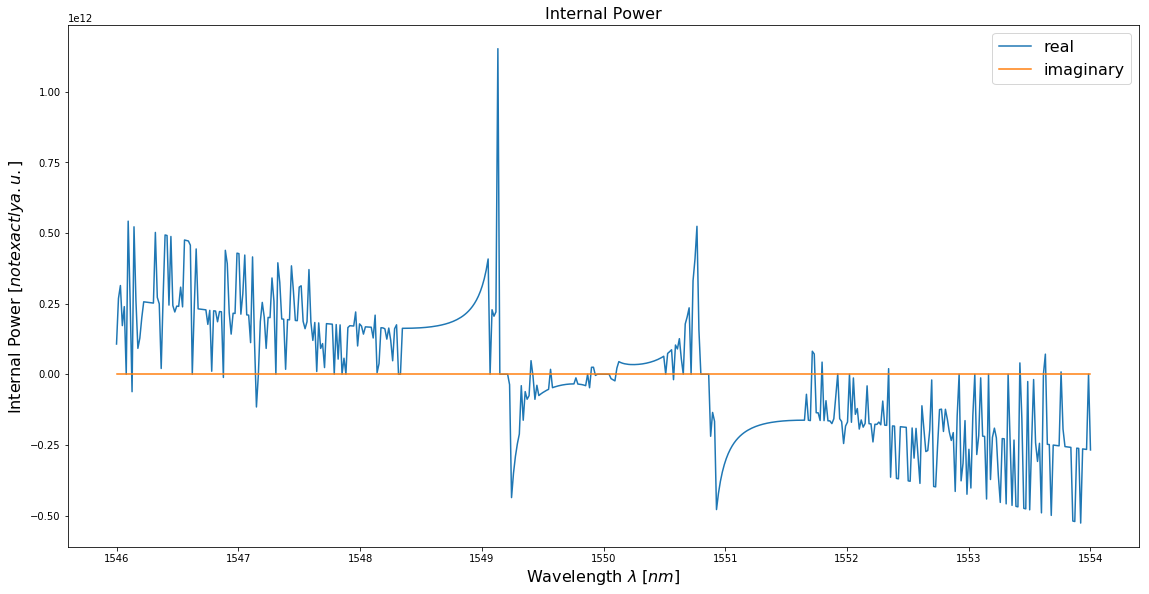

In [67]:
linear = True

plt.show()
plt.close()

fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

if not linear:
    ax1.set_yscale('log')
    ax1.set_ylim([1e-20, 1e-2])
    
ax1.plot(1e9*freq_to_wlen(ω_range), data3, label='real')
ax1.plot(1e9*freq_to_wlen(ω_range), data4, label='imaginary')

ax1.set_title( r'Internal Power', fontsize=16)
ax1.set_xlabel(r'Wavelength $\lambda$ $[nm]$', fontsize=16)
ax1.set_ylabel(r'Internal Power $[not exactly a.u.]$', fontsize=16)

legend = ax1.legend(loc='upper right', fontsize=16)#, bbox_to_anchor=(1, 0.5))

plt.show()
plt.close()